# 0.0 Imports

In [50]:
import bt
import btalib as bta

import pickle
#import warnings
import inflection
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader

from matplotlib import pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

## 0.1 Helper Functions

In [6]:
def jupyter_settings():
    %matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    plt.rcParams['figure.dpi'] = 100
    
#    pd.options.display.max_columns = None
#   pd.options.display.max_rows = None
#    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    # ignora future warnings
    #warnings.filterwarnings('ignore')
    
    sns.set()

In [7]:
jupyter_settings()

## 0.2 Load Data

In [21]:
df_prio = pandas_datareader.data.get_data_yahoo('PRIO3.SA', start='10-01-2021')

# 1.0 Descrição dos dados

In [22]:
df1 = df_prio.copy()

In [23]:
df1.head().T

Date,2021-10-01,2021-10-04,2021-10-05,2021-10-06,2021-10-07
High,26.35,26.98,27.57,26.99,27.67
Low,25.02,25.91,26.16,25.13,26.27
Open,25.02,26.58,26.79,25.48,27.30
Close,26.35,26.06,26.20,26.25,26.70
Volume,37511200.00,24216600.00,30201900.00,34950300.00,31664700.00
Adj Close,26.35,26.06,26.20,26.25,26.70


## 1.1 Rename Columns

In [44]:
old_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

snakecase = lambda x : inflection.underscore(x)

new_cols = list(map(snakecase, old_cols))

# rename
df1.columns = new_cols

## 1.2 Data Dimension

In [24]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 257
Number of columns: 6


## 1.3 Data Types

In [45]:
df1.dtypes

high         float64
low          float64
open         float64
close        float64
volume         int64
adj close    float64
dtype: object

## 1.4 Check NA

In [26]:
df1.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

## 1.7 Descriptive Statistical

### 1.7.1 Numerical Attributes

In [27]:
# Central tendency and Dispersion
d1 = pd.DataFrame (df1.apply( lambda x: x.max() - x.min() )).T
d2 = df1.agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis'])

# concatenate
m2 = pd.concat([d1, d2]).T.reset_index()
m2.columns = ['attibutes', 'range', 'min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']
m2 = m2[['attibutes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']]

m2

,attibutes,min,max,range,mean,median,std,skew,kurtosis
0,High,19.44,32.55,13.11,25.31,25.29,2.74,0.00,-0.51
1,Low,18.49,31.40,12.91,24.14,24.16,2.68,0.03,-0.38
2,Open,19.01,32.36,13.35,24.73,24.69,2.70,-0.00,-0.47
3,Close,18.49,32.01,13.52,24.70,24.75,2.71,0.01,-0.42
4,Volume,0.00,102389800.00,102389800.00,19761347.47,17840600.00,9288736.05,3.42,24.51
5,Adj Close,18.49,32.01,13.52,24.70,24.75,2.71,0.01,-0.42


In [38]:
# Check range of days
df_aux = df1.reset_index()

(df_aux['Date'].max() - df_aux['Date'].min()).days

375

# 2.0 Feature Engineering

## 2.1 MindMap Hypothesis

## 2.2 Lista final de hipóteses

## 2.3 Feature Engineering

# 3.0 Filtragem de variáveis

## 3.1 Filtragem das linhas

## 3.2 Seleção das colunas

# 4.0 Backtesting

# 4.1 Create Strategy

In [69]:
df4 = df1.copy()

In [70]:
df4['signal'] = df4['close']

In [71]:
aux = pd.DataFrame()
aux = bta.bbands(df4.signal, period=20, devs=2.0).df

In [72]:
df4 = pd.concat([df4, aux], axis=1)

In [73]:
df4 = df4.fillna(0)

In [81]:
df4['signal'] = df4.apply(lambda x: -1.0 if x['close'] > x['top'] else 1.0 if x['close'] <= x['bot'] else 0.0, axis=1)

In [83]:
df4.tail(10)

,high,low,open,close,volume,adj close,signal,mid,top,bot
Date,,,,,,,,,,
2022-09-28,28.33,27.07,27.25,27.91,19373100,27.91,0.00,28.04,29.39,26.68
2022-09-29,27.83,26.83,27.72,27.23,11230300,27.23,0.00,28.03,29.39,26.67
2022-09-30,27.81,26.81,27.01,27.53,8803300,27.53,0.00,28.05,29.37,26.72
2022-10-03,29.43,28.50,28.58,28.94,12394100,28.94,0.00,28.11,29.48,26.73
2022-10-04,30.97,29.44,29.49,30.33,28091600,30.33,-1.00,28.15,29.71,26.58
2022-10-05,31.85,30.09,30.29,31.30,17696000,31.30,-1.00,28.28,30.35,26.20
2022-10-06,31.85,31.17,31.72,31.61,9359500,31.61,-1.00,28.48,30.98,25.97
2022-10-07,32.55,31.40,31.51,32.01,10854100,32.01,-1.00,28.68,31.60,25.75
2022-10-10,32.40,31.23,32.36,31.46,11087800,31.46,0.00,28.87,31.99,25.75


## 4.2 Backtesting

In [116]:
df4_aux = pd.DataFrame()
df4_aux['signal'] = df4[['close']].copy()

In [119]:
bbands = bt.Strategy('bbands', [bt.algos.WeighTarget(df4[['signal']]), bt.algos.Rebalance()])

btest = bt.Backtest(bbands, df4_aux)

results = bt.run(btest)

results.display()

Stat                 bbands
-------------------  ----------
Start                2021-09-30
End                  2022-10-11
Risk-free rate       0.00%

Total Return         12.19%
Daily Sharpe         0.66
Daily Sortino        1.07
CAGR                 11.82%
Max Drawdown         -12.53%
Calmar Ratio         0.94

MTD                  -3.74%
3m                   6.23%
6m                   8.00%
YTD                  0.21%
1Y                   18.49%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  11.82%

Daily Sharpe         0.66
Daily Sortino        1.07
Daily Mean (ann.)    13.31%
Daily Vol (ann.)     20.27%
Daily Skew           0.95
Daily Kurt           13.39
Best Day             7.26%
Worst Day            -6.42%

Monthly Sharpe       0.63
Monthly Sortino      1.38
Monthly Mean (ann.)  12.41%
Monthly Vol (ann.)   19.63%
Monthly Skew         0.48
Monthly Kurt         -0.42
Best Month           10.57%
Worst Month          -7.07%

Yearly Sharpe 

<AxesSubplot:title={'center':'Equity Progression'}>

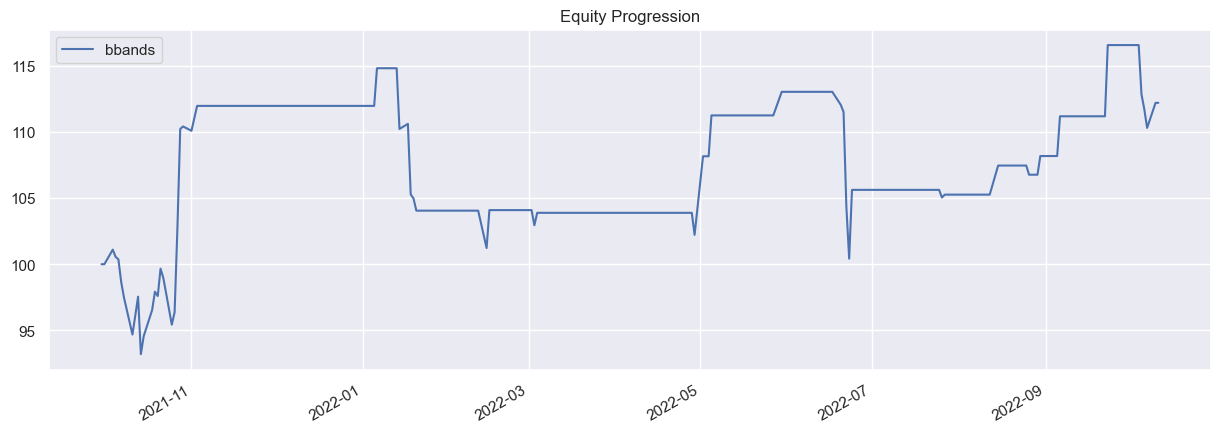

In [126]:
%matplotlib inline
results.plot();

In [127]:
results.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2021   0      0       0      0     0      0      0      0      0     10.41   1.41      0  11.96
  2022  -7.07   0.04   -0.2   -1.6  10.57  -6.55  -0.34   2.77   7.75  -3.74   0         0   0.21
